In [1]:
pip install tensorflow

In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ipaddress
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from imblearn.over_sampling import SMOTE

In [3]:
df = pd.read_csv("cybersecurity_attacks.csv", parse_dates=['Timestamp'])

In [4]:
df.head().T

,0,1,2,3,4
Timestamp,2023-05-30 06:33:58,2020-08-26 07:08:30,2022-11-13 08:23:25,2023-07-02 10:38:46,2023-07-16 13:11:07
Source IP Address,103.216.15.12,78.199.217.198,63.79.210.48,163.42.196.10,71.166.185.76
Destination IP Address,84.9.164.252,66.191.137.154,198.219.82.17,101.228.192.255,189.243.174.238
Source Port,31225,17245,16811,20018,6131
Destination Port,17616,48166,53600,32534,26646
Protocol,ICMP,ICMP,UDP,UDP,TCP
Packet Length,503,1174,306,385,1462
Packet Type,Data,Data,Control,Data,Data
Traffic Type,HTTP,HTTP,HTTP,HTTP,DNS
Payload Data,Qui natus odio asperiores nam. Optio nobis ius...,Aperiam quos modi officiis veritatis rem. Omni...,Perferendis sapiente vitae soluta. Hic delectu...,Totam maxime beatae expedita explicabo porro l...,Odit nesciunt dolorem nisi iste iusto. Animi v...


In [5]:
print("Dimension (No.of Rows, No.of Columns) of the Dataset: ", df.shape)

Dimension (No.of Rows, No.of Columns) of the Dataset:  (40000, 25)


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Timestamp               40000 non-null  datetime64[ns]
 1   Source IP Address       40000 non-null  object        
 2   Destination IP Address  40000 non-null  object        
 3   Source Port             40000 non-null  int64         
 4   Destination Port        40000 non-null  int64         
 5   Protocol                40000 non-null  object        
 6   Packet Length           40000 non-null  int64         
 7   Packet Type             40000 non-null  object        
 8   Traffic Type            40000 non-null  object        
 9   Payload Data            40000 non-null  object        
 10  Malware Indicators      20000 non-null  object        
 11  Anomaly Scores          40000 non-null  float64       
 12  Alerts/Warnings         19933 non-null  object

In [8]:
df.describe().T


,count,mean,min,25%,50%,75%,max,std
Timestamp,40000,2021-11-22 06:17:52.200800256,2020-01-01 00:43:27,2020-12-12 19:56:28.500000,2021-11-21 18:12:51,2022-10-30 08:48:10.500000,2023-10-11 19:34:23,NaN
Source Port,40000.0,32970.35645,1027.0,16850.75,32856.0,48928.25,65530.0,18560.425604
Destination Port,40000.0,33150.86865,1024.0,17094.75,33004.5,49287.0,65535.0,18574.668842
Packet Length,40000.0,781.452725,64.0,420.0,782.0,1143.0,1500.0,416.044192
Anomaly Scores,40000.0,50.113473,0.0,25.15,50.345,75.03,100.0,28.853598


Information on Frequncy of Attacks


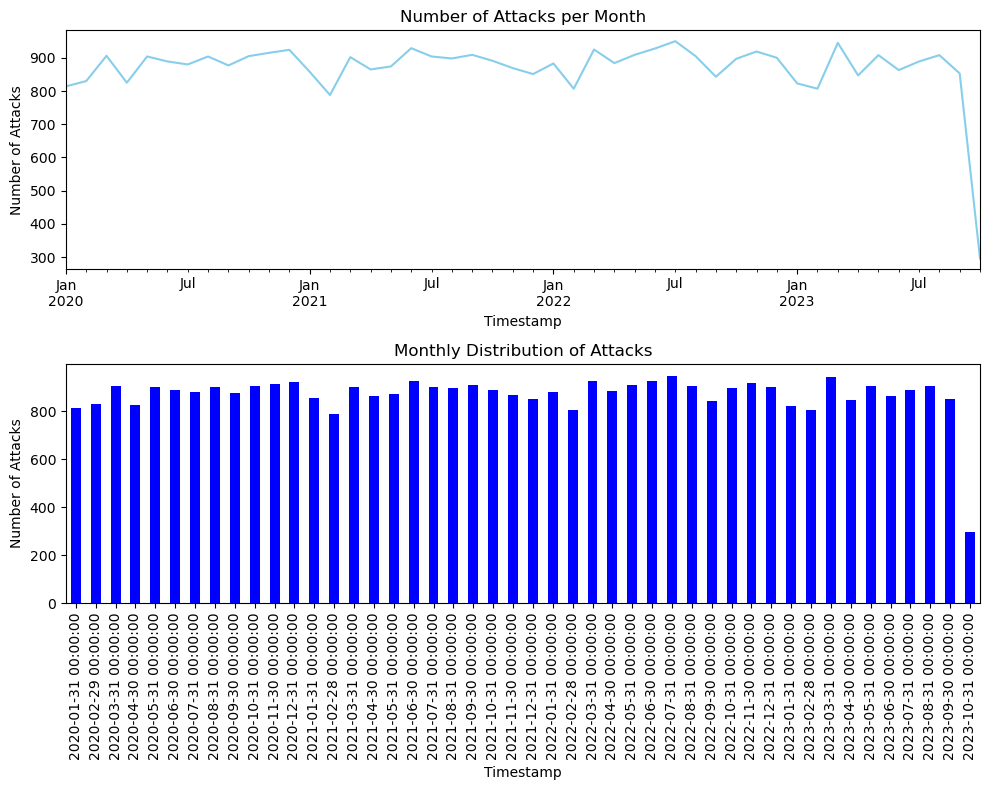

In [10]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
monthly_attacks = df.resample('M', on='Timestamp')['Attack Type'].count()
print("Information on Frequncy of Attacks")
fig, ax = plt.subplots(2, 1, figsize=(10, 8))
monthly_attacks.plot(ax=ax[0], color='skyblue')
ax[0].set_title('Number of Attacks per Month')
ax[0].set_ylabel('Number of Attacks')
monthly_attacks.plot(kind='bar', ax=ax[1], color='blue')
ax[1].set_title('Monthly Distribution of Attacks')
ax[1].set_ylabel('Number of Attacks')
plt.tight_layout()
plt.show()

In [11]:
df['Year']=df['Timestamp'].dt.year

In [12]:
attack_counts = df.groupby(['Year', 'Attack Type']).size().unstack(fill_value=0)

In [13]:
print("Summary of the No.of Attacks Year wise\n",attack_counts)

Summary of the No.of Attacks Year wise
 Attack Type  DDoS  Intrusion  Malware
Year                                 
2020         3533       3551     3489
2021         3545       3475     3518
2022         3558       3563     3629
2023         2792       2676     2671


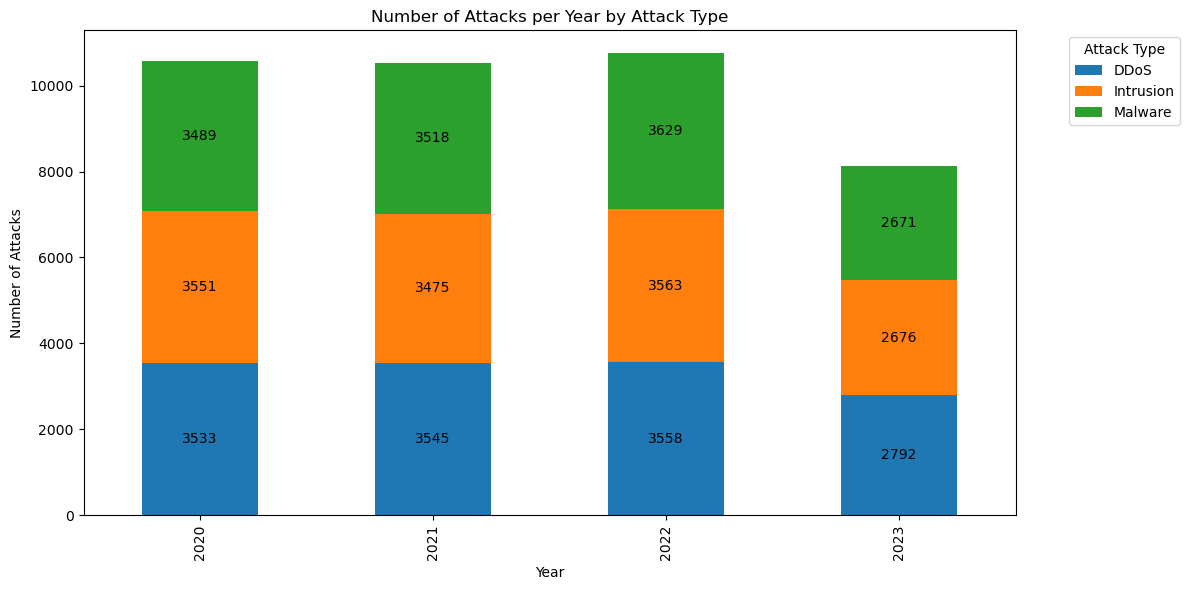

In [15]:
ax = attack_counts.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Number of Attacks per Year by Attack Type')
plt.xlabel('Year')
plt.ylabel('Number of Attacks')
plt.legend(title='Attack Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
for c in ax.containers:
 ax.bar_label(c, label_type='center')
plt.show()

  Protocol Attack Type  COUNT
0     ICMP        DDoS   4508
6      UDP        DDoS   4482
2     ICMP     Malware   4461
1     ICMP   Intrusion   4460
3      TCP        DDoS   4438
5      TCP     Malware   4437
8      UDP     Malware   4409
7      UDP   Intrusion   4408
4      TCP   Intrusion   4397


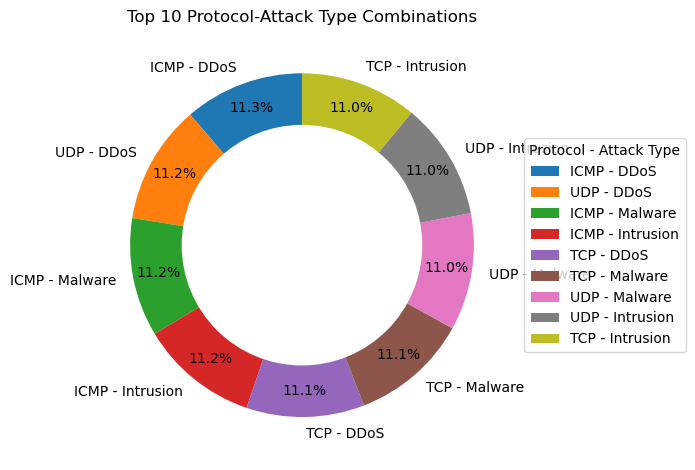

In [18]:
# Count occurrences of each combination of PROTOCOL and ATTACK TYPE
protocol_attack_counts = df.groupby(['Protocol', 'Attack Type']).size().reset_index(name='COUNT')
# Sort by count in descending order and take top 10 for better visibility
top_10 = protocol_attack_counts.sort_values('COUNT', ascending=False).head(10)
# Print a summary of the data
print(top_10)
# Create a pie chart
#ax = attack_counts.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.plot(figsize=(12, 8))
plt.pie(top_10['COUNT'], labels=top_10.apply(lambda x: f"{x['Protocol']} - {x['Attack Type']}", axis=1),
 autopct='%1.1f%%', startangle=90, pctdistance=0.85)
# Add a circle at the center to create a donut chart (optional)
center_circle = plt.Circle((0,0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(center_circle)
# Add title
plt.title('Top 10 Protocol-Attack Type Combinations')
# Add legend
plt.legend(title='Protocol - Attack Type', loc='center left', bbox_to_anchor=(1, 0, 0.5, 1))
# Adjust layout to prevent cutting off labels
plt.tight_layout()
# Show the plot
plt.show()

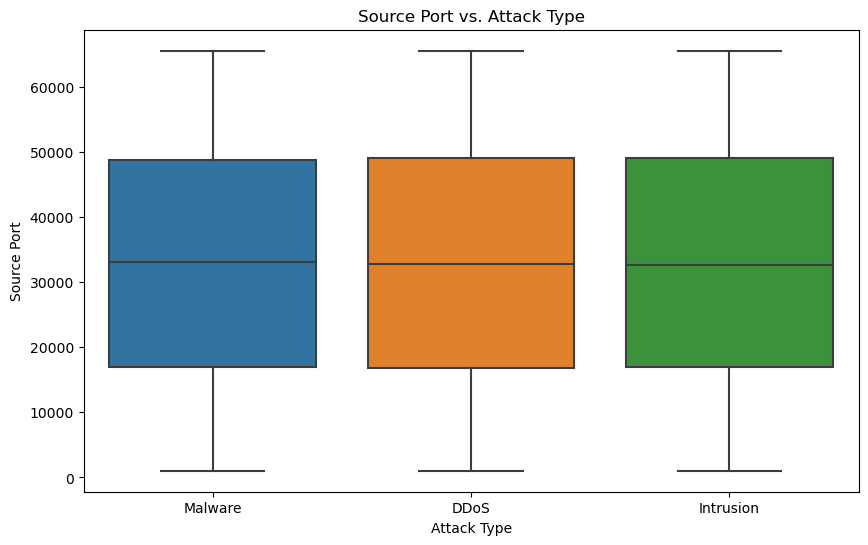

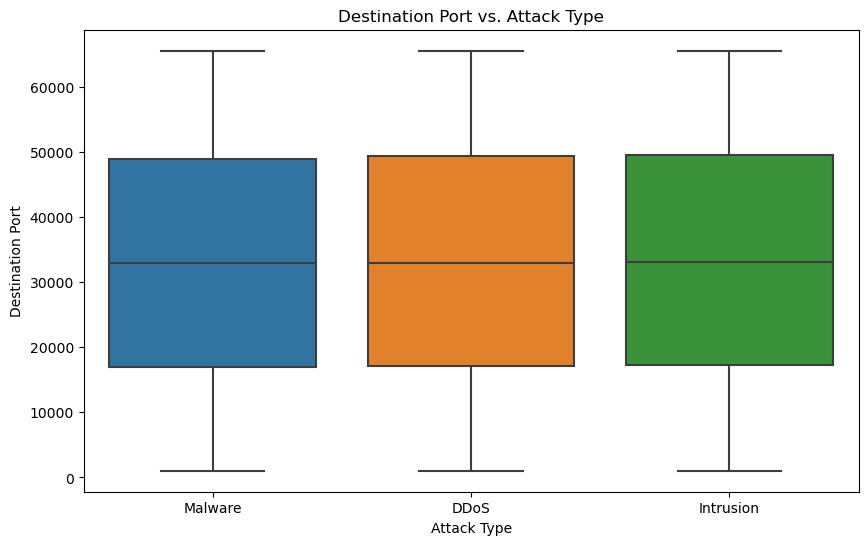

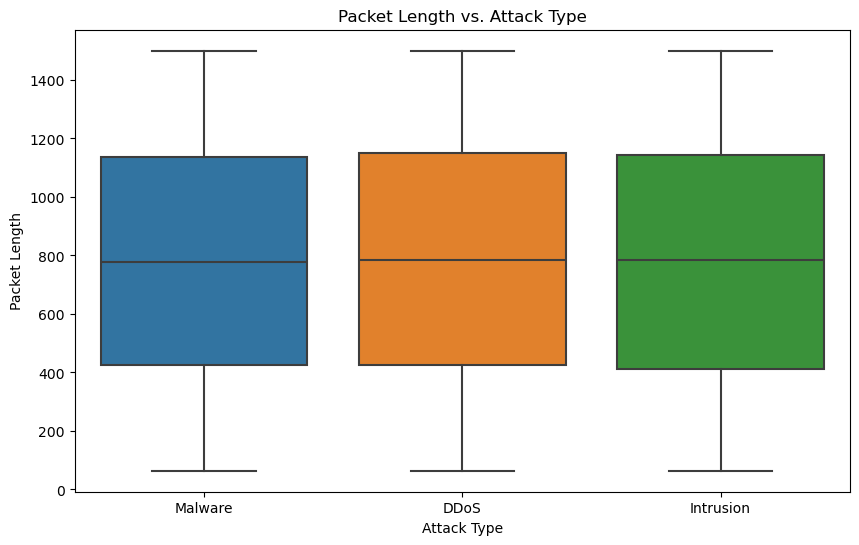

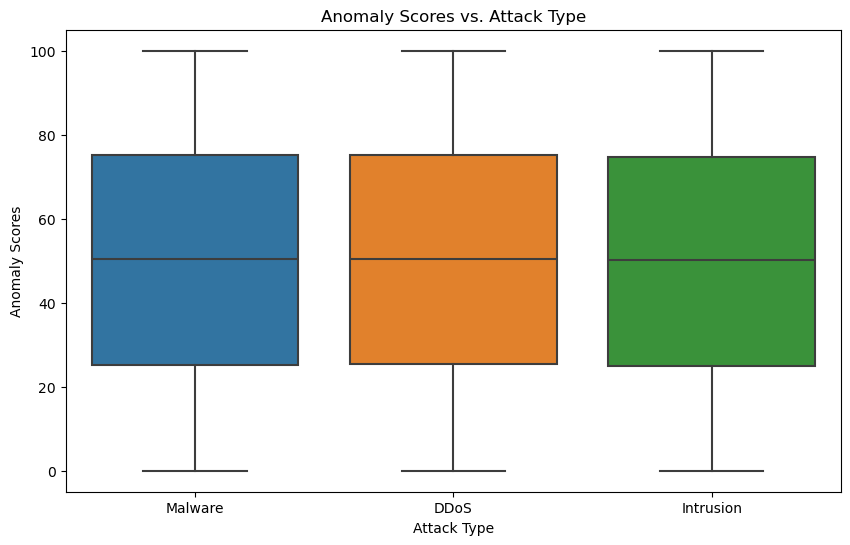

In [20]:
features = ['Source Port', 'Destination Port', 'Packet Length', 'Anomaly Scores']
for feature in features:
 plt.figure(figsize=(10, 6))
 sns.boxplot(x='Attack Type', y=feature, data=df)
 plt.title(f'{feature} vs. Attack Type')
 plt.xlabel('Attack Type')
 plt.ylabel(feature)
 plt.show()

In [25]:
#Handling Missing values: Identify the columns with missing values and fill with 0
# Get column names with missing values
columns_with_missing = df.columns[df.isnull().any()].tolist()
# Print the result
print("Columns with missing values:")
for column in columns_with_missing:
 print(column)
# If you want to also see the count of missing values:
print("\nColumns with missing values and their counts:")
for column in columns_with_missing:
 missing_count = df[column].isnull().sum()
 print(f"{column}: {missing_count}")
# Fill the missing values with 0
df = df.fillna(0)
df.info()
#Convert some of the dataset values into integer
#convert the Timestamp into UNIX Epochs time which is in a long interger format
print("Timestamp values in YYYY-MM-DD HH:MM:SS format, \n",df['Timestamp'])

Columns with missing values:
Malware Indicators
Alerts/Warnings
Proxy Information
Firewall Logs
IDS/IPS Alerts

Columns with missing values and their counts:
Malware Indicators: 20000
Alerts/Warnings: 20067
Proxy Information: 19851
Firewall Logs: 19961
IDS/IPS Alerts: 20050
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 26 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Timestamp               40000 non-null  datetime64[ns]
 1   Source IP Address       40000 non-null  object        
 2   Destination IP Address  40000 non-null  object        
 3   Source Port             40000 non-null  int64         
 4   Destination Port        40000 non-null  int64         
 5   Protocol                40000 non-null  object        
 6   Packet Length           40000 non-null  int64         
 7   Packet Type             40000 non-null  object        
 8   Traffic Typ

In [28]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'], format='%m/%d/%Y %I:%M:%S %p')
df['Timestamp'] = df['Timestamp'].apply(lambda x: int(x.timestamp()))
print("Timestamp in UNIX Epoch format:\n", df['Timestamp'])
#Convert the IP Addresses (Source IP Address & Destination IP Address) in the chosen Dataset into Integers
print("Before conversion the IP Addresses in the Dataset: \n",df.head())
def ip_to_int(ip):
 return int(ipaddress.ip_address(ip))
df['Destination IP Address'] = df['Destination IP Address'].apply(ip_to_int)
df['Source IP Address'] = df['Source IP Address'].apply(ip_to_int)
print("After conversion the IP Addresses in the Dataset: \n",df.head())

Timestamp in UNIX Epoch format:
 0        1685428438
1        1598425710
2        1668327805
3        1688294326
4        1689513067
            ...    
39995    1685110122
39996    1679877507
39997    1648691149
39998    1695407558
39999    1696939192
Name: Timestamp, Length: 40000, dtype: int64
Before conversion the IP Addresses in the Dataset: 
     Timestamp Source IP Address Destination IP Address  Source Port  \
0  1685428438     103.216.15.12           84.9.164.252        31225   
1  1598425710    78.199.217.198         66.191.137.154        17245   
2  1668327805      63.79.210.48          198.219.82.17        16811   
3  1688294326     163.42.196.10        101.228.192.255        20018   
4  1689513067     71.166.185.76        189.243.174.238         6131   

   Destination Port Protocol  Packet Length Packet Type Traffic Type  \
0             17616     ICMP            503        Data         HTTP   
1             48166     ICMP           1174        Data         HTTP   
2     

In [29]:
df.head(2).T
#Replace certain values with 1 for the columns where Firewall Logs value is 'Log Data', Malware Indicators value is 'IoC Detected' & Ale
df['Firewall Logs'] = df['Firewall Logs'].replace('Log Data', 1)
df['Malware Indicators'] = df['Malware Indicators'].replace('IoC Detected', 1)
df['Alerts/Warnings'] = df['Alerts/Warnings'].replace('Alert Triggered', 1)
print("After replacing certain values of columns: Firewall Log, Malware Indicators & Alerts/Warning with 1,\n")
df.head(2).T
#Drop columns: IDS/IPS Alerts and Proxy Information as these two feature has no valid contribution in our model
print("Dimension of Chosen Dataset: ", df.shape)
df = df.drop(columns=['IDS/IPS Alerts', 'Proxy Information', 'Year'])
print("Processed Dataset Dimension is, ", df.shape)

After replacing certain values of columns: Firewall Log, Malware Indicators & Alerts/Warning with 1,

Dimension of Chosen Dataset:  (40000, 26)
Processed Dataset Dimension is,  (40000, 23)


In [30]:
# Hot Encoding or Label Encoding, Converting the categorical values into numerical values
le = LabelEncoder()
df['Attack Type'] = le.fit_transform(df['Attack Type'])
df['Log Source'] = le.fit_transform(df['Log Source'])
df['Attack Signature'] = le.fit_transform(df['Attack Signature'])
df['Action Taken'] = le.fit_transform(df['Action Taken'])
df['Severity Level'] = le.fit_transform(df['Severity Level'])
df['User Information'] = le.fit_transform(df['User Information'])
df['Device Information'] = le.fit_transform(df['Device Information'])
df['Network Segment'] = le.fit_transform(df['Network Segment'])
df['Protocol'] = le.fit_transform(df['Protocol'])
df['Geo-location Data'] = le.fit_transform(df['Geo-location Data'])
df['Packet Type'] = le.fit_transform(df['Packet Type'])
df['Traffic Type'] = le.fit_transform(df['Traffic Type'])
df['Payload Data'] = le.fit_transform(df['Payload Data'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Timestamp               40000 non-null  int64  
 1   Source IP Address       40000 non-null  int64  
 2   Destination IP Address  40000 non-null  int64  
 3   Source Port             40000 non-null  int64  
 4   Destination Port        40000 non-null  int64  
 5   Protocol                40000 non-null  int32  
 6   Packet Length           40000 non-null  int64  
 7   Packet Type             40000 non-null  int32  
 8   Traffic Type            40000 non-null  int32  
 9   Payload Data            40000 non-null  int32  
 10  Malware Indicators      40000 non-null  int64  
 11  Anomaly Scores          40000 non-null  float64
 12  Alerts/Warnings         40000 non-null  int64  
 13  Attack Type             40000 non-null  int32  
 14  Attack Signature        40000 non-null

In [32]:
#Claculate the number of attacks using class variable: Attack Type
if 'Attack Type' in df.columns:
 attack_counts = df['Attack Type'].value_counts()
if not attack_counts.empty:
 le = LabelEncoder()
 le.fit(df['Attack Type'])
 class_names = le.inverse_transform(attack_counts.index)
 print("Attacks detected:")
attack_counts = df['Attack Type'].value_counts()
num_unique_attack_types = attack_counts.nunique()
print(f"Number of unique Attack Types: {num_unique_attack_types}")
class_names = {
 0: "DDoS",
 1: "Intrusion",
 2: "Malware"

}
print("Unique Attack Types and their Counts:")
for attack_type, count in attack_counts.items():
 class_name = class_names.get(attack_type, "Unknown Class")
 print(f"{class_name} ({attack_type}): {count}")


Attacks detected:
Number of unique Attack Types: 3
Unique Attack Types and their Counts:
DDoS (0): 13428
Malware (2): 13307
Intrusion (1): 13265


In [34]:
#Separate the Feature Variables (X) and Target/ Class Variables (y) in the Chosen Dataset
print("Dimension of the Dataset: ", df.shape)
X = df.drop(columns=['Attack Type'])
y = df['Attack Type']
print("Dimension of Feature Variables (X): ",X.shape,"Dimension of Target Variable (y): ", y.shape)

Dimension of the Dataset:  (40000, 23)
Dimension of Feature Variables (X):  (40000, 22) Dimension of Target Variable (y):  (40000,)


In [36]:
#Data balancing using SMOTE and Data Augmentation
target_size = 200000
class_counts = y.value_counts().to_dict()
total_samples_needed = target_size - len(y)
samples_per_class = {cls: count + total_samples_needed // len(class_counts) for cls, count in class_counts.items()}
smote = SMOTE(sampling_strategy=samples_per_class, random_state=42)
X_res, y_res = smote.fit_resample(X, y)
def add_noise(dataframe, noise_level=0.01):
 noise = np.random.randn(*dataframe.shape) * noise_level
 dataframe_noisy = dataframe + noise
 return dataframe_noisy
numerical_columns = X_res.select_dtypes(include=[np.number]).columns
X_res_noisy = add_noise(X_res[numerical_columns])
X_augmented = pd.concat([X_res, X_res_noisy], ignore_index=True)
y_augmented = pd.concat([y_res, y_res], ignore_index=True)
df_resampled = X_augmented.copy()
df_resampled['Attack Type'] = y_augmented

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 399998 entries, 0 to 399997
Data columns (total 23 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Timestamp               399998 non-null  float64
 1   Source IP Address       399998 non-null  float64
 2   Destination IP Address  399998 non-null  float64
 3   Source Port             399998 non-null  float64
 4   Destination Port        399998 non-null  float64
 5   Protocol                399998 non-null  float64
 6   Packet Length           399998 non-null  float64
 7   Packet Type             399998 non-null  float64
 8   Traffic Type            399998 non-null  float64
 9   Payload Data            399998 non-null  float64
 10  Malware Indicators      399998 non-null  float64
 11  Anomaly Scores          399998 non-null  float64
 12  Alerts/Warnings         399998 non-null  float64
 13  Attack Signature        399998 non-null  float64
 14  Action Taken        

Text(0.5, 1.0, 'Ditribution of Attacks (After Data Balancing)')

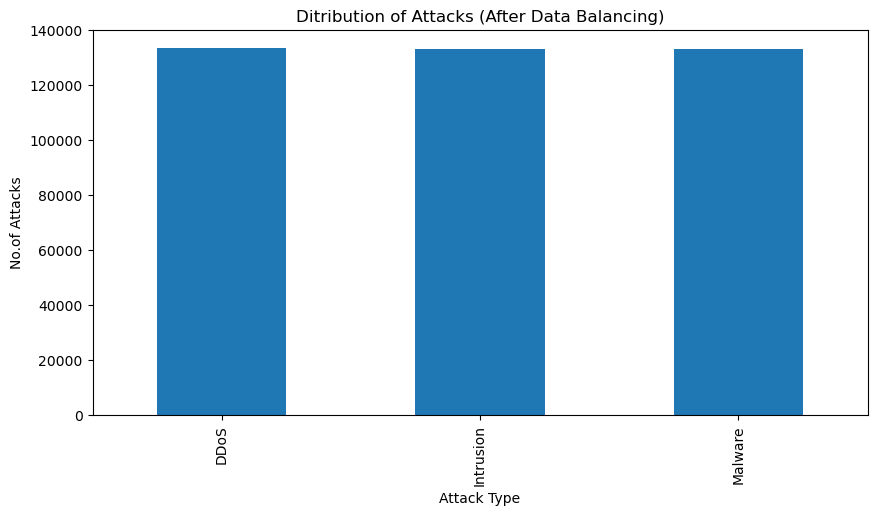

In [37]:
df_resampled.info() #df_resampled.shape
#Number of Attack classes after Data Balancing
print("Number of Attack Classes: ",df_resampled['Attack Type'].unique())
print("\nNumber of Samples for each Attack Classes: ",df_resampled['Attack Type'].value_counts())
# Plotting the data samples after DATA BALANCING using SMOTE
plt.figure(figsize=(10,5))
df_resampled['Attack Type'].value_counts().plot(kind='bar')
plt.xticks([0,1,2], ['DDoS', 'Intrusion', 'Malware'])
plt.ylabel('No.of Attacks')
plt.title("Ditribution of Attacks (After Data Balancing)")

In [45]:
X_train, X_test, y_train, y_test = train_test_split(df_resampled.drop(columns=['Attack Type']), 
                                                   df_resampled['Attack Type'], 
                                                   test_size=0.2,  # 20% for testing
                                                   random_state=42)

print("After Splitting the Dataset,\nDimensions of TRAINING SET: ", X_train.shape, y_train.shape)
print("Dimensions of TESTING SET: ", X_test.shape, y_test.shape)

# Display the first 2 rows of each of the resulting datasets
X_train.head(2), y_train.head(2), X_test.head(2), y_test.head(2)                                    

After Splitting the Dataset,
Dimensions of TRAINING SET:  (319998, 22) (319998,)
Dimensions of TESTING SET:  (80000, 22) (80000,)


(           Timestamp  Source IP Address  Destination IP Address   Source Port  \
 63504   1.590621e+09       2.470071e+09            3.689676e+09  18026.000000   
 208337  1.595381e+09       1.286472e+09            2.456478e+09   3038.006169   
 
         Destination Port  Protocol  Packet Length  Packet Type  Traffic Type  \
 63504        9930.000000  0.000000     955.000000     0.000000      0.000000   
 208337      21018.987342  0.994953    1459.004584    -0.013125      0.990747   
 
         Payload Data  ...  Alerts/Warnings  Attack Signature  Action Taken  \
 63504    9971.000000  ...         0.000000           0.00000      1.000000   
 208337  24754.988875  ...        -0.005948          -0.01872      1.997332   
 
         Severity Level  User Information  Device Information  Network Segment  \
 63504         0.000000       5174.000000         13954.00000          2.00000   
 208337        1.022817       7648.010607         18232.98944          1.00272   
 
         Geo-locatio

In [46]:
# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
# Convert labels to categorical format
num_classes = len(np.unique(y_train))
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)
print("After Feature Scaling,\nDimensions of TRAINING SET: ", X_train.shape,y_train.shape)
print("Dimensions of TESTING SET: ", X_test.shape,y_test.shape)

After Feature Scaling,
Dimensions of TRAINING SET:  (319998, 22) (319998, 3)
Dimensions of TESTING SET:  (80000, 22) (80000, 3)
